In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
colnames=['CityFrom','CityTo','AvgFare','Distance','AvgWeekPsgrs',
          'MktLeadArLn','MktShare','AvgFareLead','LowPriceArLn','MktShareLow','Price'] 
demo= pd.read_fwf('http://users.stat.ufl.edu/~winner/data/airq402.dat', names=colnames)

In [11]:
demo.head()

,CityFrom,CityTo,AvgFare,Distance,AvgWeekPsgrs,MktLeadArLn,MktShare,AvgFareLead,LowPriceArLn,MktShareLow,Price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [13]:
data=demo.drop(['CityFrom','CityTo','MktLeadArLn','LowPriceArLn'],axis=1)

In [15]:
data.head()

,AvgFare,Distance,AvgWeekPsgrs,MktShare,AvgFareLead,MktShareLow,Price
0,114.47,528,424.56,70.19,111.03,70.19,111.03
1,122.47,860,276.84,75.10,123.09,17.23,118.94
2,214.42,852,215.76,78.89,223.98,2.77,167.12
3,69.40,288,606.84,96.97,68.86,96.97,68.86
4,158.13,723,313.04,39.79,161.36,15.34,145.42


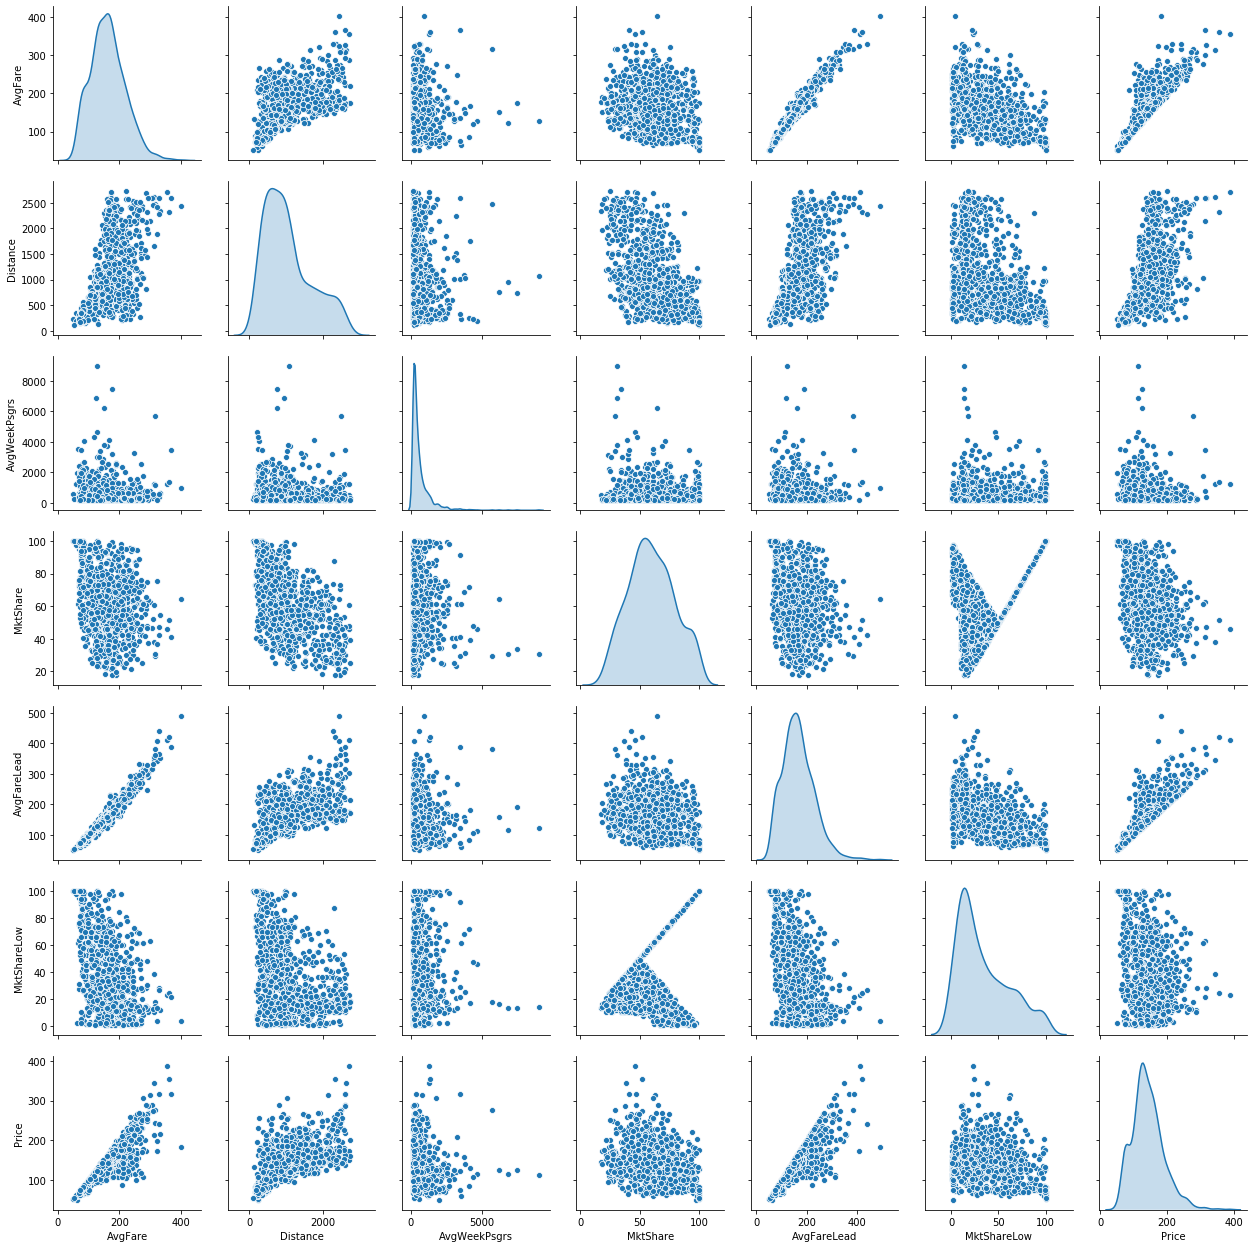

In [18]:
sns.pairplot(data,diag_kind='kde')
plt.show()

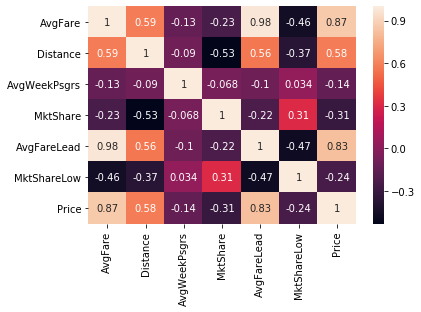

In [16]:
sns.heatmap(data.corr(),annot=True)

In [19]:
# create X and y
X = data.drop('AvgFare',axis=1)
y = data.AvgFare
# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)
# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)
print("Testing accuracy of the model")
print(lm.score(x_test,y_test))

10.819841382886324
[ 0.00216813 -0.00099917  0.06431649  0.70821567 -0.06545633  0.21863892]
Testing accuracy of the model
0.9698236772188937


In [22]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='AvgFare ~ Distance+AvgWeekPsgrs+MktShare+AvgFareLead+ MktShareLow+Price',data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                AvgFare   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     6255.
Date:                Wed, 01 Apr 2020   Prob (F-statistic):               0.00
Time:                        12:35:32   Log-Likelihood:                -3603.3
No. Observations:                1000   AIC:                             7221.
Df Residuals:                     993   BIC:                             7255.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       10.8198      1.743      6.207      0.000       7.399      14.241
Distance         0.0022      0.001      3.451      0.001       0.001       0.003
AvgWeekPsgrs    -0.0010      0.000     -2.654      0.008      -0.002      -0.000
MktShare         0.0643      0.018      3.526      0.000       0.029       0.100
AvgFareLead      0.7082      0.010     73.529      0.000       0.689       0.727
MktShareLow     -0.0655      0.013     -4.957      0.000      -0.091      -0.040
Price            0.2186      0.012     18.107      0.000       0.195       0.242
==============================================================================
Omnibus:                      130.876   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              691.994
Skew:                           0.467   Prob(JB):                    5.44e-151
Kurtosis:                       6.967   Cond. No.                     8.83e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
data.columns

Index(['AvgFare', 'Distance', 'AvgWeekPsgrs', 'MktShare', 'AvgFareLead',
       'MktShareLow', 'Price'],
      dtype='object')